In [ ]:
## 워드 클라우드 사용에 필요한 설치

# 1.
# # 우선 jdk 설치가 필요하며 최신버전 설치
# https://www.oracle.com/java/technologies/downloads
# 에서 조금 아래쪽에 windows클릭 - >x64 install 클릭하여 다운로드 후 설치진행


# 2. 윈도우버튼 ->
#    [설정]-[메뉴]-[시스템]-[정보]-[고급시스템설정]-[환경변수]
#    [시스템변수]-[새로만들기]
#    변수이름 : JAVA_HOME
#    변수 값 : c:\programfiles\java\jdk-17.0.0\bin\server ===============> 재부팅~~~


In [1]:
# 패키지 설치
!pip install wordcloud
!pip install counter
!pip install konlpy

  Using cached Counter-1.0.0.tar.gz (5.2 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [8 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\JBEDU000\AppData\Local\Temp\pip-install-faic1siy\counter_d80d66d45d934ec385cf4e9f809fb412\setup.py", line 32, in <module>
      long_description=getLongDescription(),
    File "C:\Users\JBEDU000\AppData\Local\Temp\pip-install-faic1siy\counter_d80d66d45d934ec385cf4e9f809fb412\setup.py", line 13, in getLongDescription
      for line in file:
  UnicodeDecodeError: 'cp949' codec can't decode byte 0xe2 in position 2095: illegal multibyte sequence
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentio

In [2]:
# 워드클라우드 구현을 위한 함수 불러오기
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
from PIL import Image
import numpy as np
from konlpy.tag import Hannanum

In [3]:
txt = open('data/wordcloud_001.txt','rt', encoding='UTF-8').read()

txt

'닭이 너무 맛있어요 최고!! 육질이 살아있음\n배송도 빠르고 상품도 좋습니다. ^^\n기가막히게 맛있습니다. 사장님 감사합니다.\n닭이 너무 작아요! 양이 작은 편인데도 부족하네요. ><\n완전 만족합니다. 재구매 각이네요.\n삼계탕에 넣었는데 양이 기대 이하네요...\n배송이 늦었네요. 보내주신 아이스팩이 터져서 치운다고 고생했네요. 포장에 신경써야 할듯...\n닭이 엄청 크고 실하네요. 들어갈만한 냄비가 없어서 큰 냄비를 샀네요. 맛도 좋습니다.\n아이스박스가 터져서 왔네요. 비닐도 벗겨지고... 다시 구매하고 싶지 않네요. 그나마 닭이 상하지 않은게 다행인듯...\n닭에 기름이 너무 많네요. 기름제거가 너무 힘들었네요. ㅠㅠ\n살이 너무 퍽퍽해요. 요리를 잘 못한 건지 닭 자체가 그런건지 잘 모르겠네요.\n너무 신선합니다. 살도 너무 부드러워요. 오랜만에 가족들과 맛있는 삼계탕 해먹었네요. 감사합니다.\n가격이 저렴함에도 불구하고, 닭이 너무 신선하고 맛있네요. 담에 또 구매할 생각입니다.\n싼 게 비지떡이라더니 그 말이 딱 맞네요. 저한텐 닭이 너무 작네요. 실망입니다.\n착한 가격에 뽑기가 잘된 건지 저는 너무 맛있게 잘 먹었습니다. 만족합니다. ^0^\n씻은 뒤에 에어프라이에 소금만 쳐서 돌려 먹었는데 남편도, 아이도 너무 잘 먹었습니다. 양이 좀 작은 건 아쉬웠네요.\n만족해요 만족해요 만족해요 만족해요 ^-^\n생닭인데 피가 제대로 안씻긴 듯 합니다. 씻는데 피가 자꾸 나와서 무서웠네요.\n배송하면서 아이스박스가 터진건지 보낼 때부터 이랬던 건지... 닭도 상해서 왔네요. 환불 요청합니다.\n두 마리를 시켰는데 한 마리는 큰 데 나머지 한 마리는 눈에 띄게 작네요. 가격이 싸서 그렇겠죠?\n좋아요~ 저렴한 가격에 잘 산 것 같네요. :)\n어머니가 담에는 좀 더 큰 닭으로 사라고 하시네요. 맛은 있는데 양이 작습니다. ㅡㅡ...\n맛있게 먹었습니다. 배송도 빠른 편이네요.\n싱싱합니다. 추천 박을게요.\n백숙용으로는 적합하지 않은 것 같습니다.

In [4]:
# txt 문서에서 명사만 추출하기
n1 = Hannanum().nouns(txt)
n1

['닭',
 '최고',
 '육질',
 '배송',
 '상품',
 '기가막히',
 '사장님',
 '감사',
 '닭',
 '양',
 '편',
 '부족',
 '완전',
 '만족',
 '재구',
 '각',
 '삼계탕',
 '양',
 '기대',
 '이하',
 '배송',
 '아이스팩',
 '고생',
 '포장',
 '듯',
 '닭',
 '만',
 '냄비',
 '냄비',
 '맛',
 '아이스박스',
 '비닐',
 '구매',
 '닭',
 '다행',
 '듯',
 '닭',
 '기름제거',
 'ㅠㅠ',
 '살',
 '퍽퍽해요',
 '요리',
 '것',
 '닭',
 '자체',
 '것',
 '신선',
 '살',
 '오랜만',
 '가족들',
 '삼계탕',
 '해먹었네요',
 '감사',
 '가격',
 '저렴함',
 '불구',
 '닭',
 '신선',
 '구매',
 '생각',
 '것',
 '비지떡',
 '말',
 '저한텐',
 '닭',
 '실망',
 '가격',
 '것',
 '저',
 '만족',
 '^0',
 '뒤',
 '에어프라이',
 '소금',
 '남편',
 '아이',
 '양',
 '거',
 '만족',
 '만족',
 '만족',
 '만족',
 '생닭',
 '피',
 '안씻긴',
 '듯',
 '피',
 '배송하',
 '아이스박스',
 '것',
 '때',
 '것',
 '닭',
 '환불',
 '요청',
 '두',
 '마리',
 '마리',
 '데',
 '나머지',
 '마리',
 '눈',
 '가격',
 '저렴한',
 '가격',
 '것',
 '어머니',
 '닭',
 '맛',
 '양',
 'ㅡㅡ',
 '배송',
 '편',
 '싱싱',
 '추천',
 '박을게요',
 '백숙용',
 '적합',
 '것',
 '마트',
 '닭',
 '저',
 '싱싱',
 '양',
 '저',
 '적당',
 '것',
 '번창',
 '밥솥',
 '닭',
 '죽',
 '해먹었습니',
 '처음',
 '실패',
 '안',
 '것',
 '쫄깃쫄깃',
 '육질',
 '재구',
 '예정',
 '것',
 '같긴한데',
 '맛',
 '요리',
 '겉

In [5]:
# 명사 15개만 확인
n1[0:15]

['닭',
 '최고',
 '육질',
 '배송',
 '상품',
 '기가막히',
 '사장님',
 '감사',
 '닭',
 '양',
 '편',
 '부족',
 '완전',
 '만족',
 '재구']

In [6]:
# 인덱스를 이용해 특정값 변경
n1[14] = '재구매'
n1[0:15]

['닭',
 '최고',
 '육질',
 '배송',
 '상품',
 '기가막히',
 '사장님',
 '감사',
 '닭',
 '양',
 '편',
 '부족',
 '완전',
 '만족',
 '재구매']

In [7]:
# 글자수가 2개 이상인 단어만 필터링
n2 = [i    for i in n1  if len(i) >= 2]
n2

['최고',
 '육질',
 '배송',
 '상품',
 '기가막히',
 '사장님',
 '감사',
 '부족',
 '완전',
 '만족',
 '재구매',
 '삼계탕',
 '기대',
 '이하',
 '배송',
 '아이스팩',
 '고생',
 '포장',
 '냄비',
 '냄비',
 '아이스박스',
 '비닐',
 '구매',
 '다행',
 '기름제거',
 'ㅠㅠ',
 '퍽퍽해요',
 '요리',
 '자체',
 '신선',
 '오랜만',
 '가족들',
 '삼계탕',
 '해먹었네요',
 '감사',
 '가격',
 '저렴함',
 '불구',
 '신선',
 '구매',
 '생각',
 '비지떡',
 '저한텐',
 '실망',
 '가격',
 '만족',
 '^0',
 '에어프라이',
 '소금',
 '남편',
 '아이',
 '만족',
 '만족',
 '만족',
 '만족',
 '생닭',
 '안씻긴',
 '배송하',
 '아이스박스',
 '환불',
 '요청',
 '마리',
 '마리',
 '나머지',
 '마리',
 '가격',
 '저렴한',
 '가격',
 '어머니',
 'ㅡㅡ',
 '배송',
 '싱싱',
 '추천',
 '박을게요',
 '백숙용',
 '적합',
 '마트',
 '싱싱',
 '적당',
 '번창',
 '밥솥',
 '해먹었습니',
 '처음',
 '실패',
 '쫄깃쫄깃',
 '육질',
 '재구',
 '예정',
 '같긴한데',
 '요리',
 '겉모습',
 '마트',
 '차이']

In [8]:
# 명사별 빈도 추출
cnt = Counter(n2)
cnt

Counter({'최고': 1,
         '육질': 2,
         '배송': 3,
         '상품': 1,
         '기가막히': 1,
         '사장님': 1,
         '감사': 2,
         '부족': 1,
         '완전': 1,
         '만족': 6,
         '재구매': 1,
         '삼계탕': 2,
         '기대': 1,
         '이하': 1,
         '아이스팩': 1,
         '고생': 1,
         '포장': 1,
         '냄비': 2,
         '아이스박스': 2,
         '비닐': 1,
         '구매': 2,
         '다행': 1,
         '기름제거': 1,
         'ㅠㅠ': 1,
         '퍽퍽해요': 1,
         '요리': 2,
         '자체': 1,
         '신선': 2,
         '오랜만': 1,
         '가족들': 1,
         '해먹었네요': 1,
         '가격': 4,
         '저렴함': 1,
         '불구': 1,
         '생각': 1,
         '비지떡': 1,
         '저한텐': 1,
         '실망': 1,
         '^0': 1,
         '에어프라이': 1,
         '소금': 1,
         '남편': 1,
         '아이': 1,
         '생닭': 1,
         '안씻긴': 1,
         '배송하': 1,
         '환불': 1,
         '요청': 1,
         '마리': 3,
         '나머지': 1,
         '저렴한': 1,
         '어머니': 1,
         'ㅡㅡ': 1,
         '싱싱': 2

In [9]:
# 빈도수가 많은 단어 순서대로 10개만 표시
cnt.most_common()[0:10]

[('만족', 6),
 ('가격', 4),
 ('배송', 3),
 ('마리', 3),
 ('육질', 2),
 ('감사', 2),
 ('삼계탕', 2),
 ('냄비', 2),
 ('아이스박스', 2),
 ('구매', 2)]

In [10]:
# 워드클라우드용 폰트 설정
wcs = WordCloud(font_path = 'C:/Windows/Fonts/MalangmalangB.ttf', 
                                    background_color = 'white', colormap='RdBu')

##  https://matplotlib.org/stable/users/explain/colors/colormaps.html

In [11]:
# 단어별 빈도로 워드클라우드 생성
cloud = wcs.generate_from_frequencies(cnt)

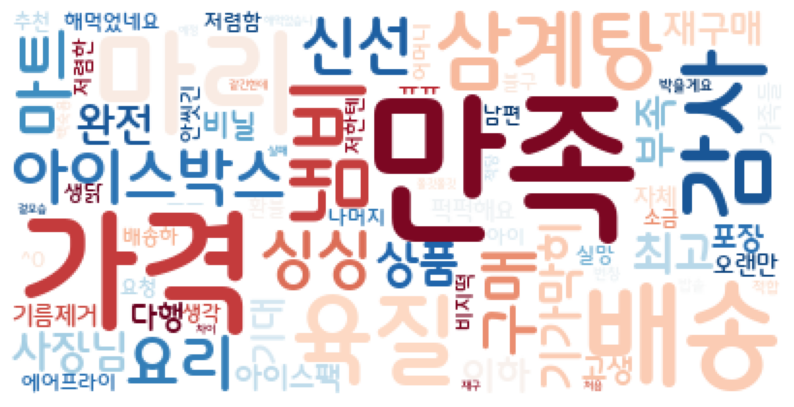

In [13]:
# 워드클라우드 그리기
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
plt.axis('off')
plt.imshow(cloud)
plt.savefig('data/wordcloud_001_image.png') 


###### 대한민국헌법

In [14]:
consti = open('data/대한민국헌법.txt','rt', encoding='UTF-8').read()
consti

'\ufeff대한민국헌법\n[시행 1988. 2. 25] [헌법 제10호, 1987. 10. 29, 전부개정]\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다. \n       제1장 총강 \n제1조 ①대한민국은 민주공화국이다.\n  ②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.\n제2조 ①대한민국의 국민이 되는 요건은 법률로 정한다.\n  ②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.\n제3조 대한민국의 영토는 한반도와 그 부속도서로 한다.\n제4조 대한민국은 통일을 지향하며, 자유민주적 기본질서에 입각한 평화적 통일 정책을 수립하고 이를 추진한다.\n제5조 ①대한민국은 국제평화의 유지에 노력하고 침략적 전쟁을 부인한다.\n  ②국군은 국가의 안전보장과 국토방위의 신성한 의무를 수행함을 사명으로 하며, 그 정치적 중립성은 준수된다.\n제6조 ①헌법에 의하여 체결·공포된 조약과 일반적으로 승인된 국제법규는 국내법과 같은 효력을 가진다.\n  ②외국인은 국제법과 조약이 정하는 바에 의하여 그 지위가 보장된다.\n제7조 ①공무원은 국민전체에 대한 봉사자이며, 국민에 대하여 책임을 진다.\n  ②공무원의

In [19]:
# txt 문서에서 명사만 추출하기
c1 = Hannanum().nouns(consti)
c1

['\ufeff대한민국헌법',
 '시행',
 '1988',
 '2.',
 '25',
 '헌법',
 '제10호,',
 '1987',
 '10',
 '29',
 '전부개정',
 '유구',
 '역사',
 '전통',
 '빛',
 '우리',
 '대한국민',
 '3·1운동',
 '건립',
 '대한민국임시정부',
 '법통',
 '불의',
 '항거',
 '4·19민주이념',
 '계승',
 '조국',
 '민주개혁',
 '평화적',
 '통일',
 '사명',
 '입각',
 '정의·인도',
 '동포애',
 '민족',
 '단결',
 '사회적',
 '폐습',
 '불의',
 '타파',
 '자율',
 '조화',
 '바탕',
 '자유민주적',
 '기본질서',
 '정치·경제·사회·문화',
 '영역',
 '각인',
 '기회',
 '능력',
 '최고도',
 '발휘',
 '자유',
 '권리',
 '책',
 '의무',
 '완수',
 '안',
 '국민생활',
 '균등',
 '향상',
 '기',
 '밖',
 '항구적',
 '세계평화',
 '인류공영',
 '이바',
 '우리들',
 '우리들',
 '자손',
 '전',
 '자유',
 '행복',
 '확보',
 '것',
 '다짐',
 '1948년',
 '7월',
 '12일',
 '제정',
 '8차',
 '개정',
 '헌법',
 '국회',
 '의결',
 '국민투표',
 '개정',
 '제1장',
 '총강',
 '제1조',
 '①대한민국',
 '민주공화국',
 '②대한민국',
 '주권',
 '국민',
 '권력',
 '국민',
 '제2조',
 '①대한민국',
 '국민',
 '요건',
 '법률',
 '②국가',
 '법률',
 '바',
 '재외국민',
 '보호',
 '의무',
 '제3조',
 '대한민국',
 '영토',
 '한반도',
 '부속도서',
 '제4조',
 '대한민국',
 '통일',
 '지향',
 '자유민주적',
 '기본질서',
 '입각',
 '평화적',
 '통',
 '정책',
 '수립',
 '이',
 '추진',
 '제5조',
 '①대한민국',
 '국제평화',
 

In [26]:
# 글자수가 2개 이상인 단어만 필터링
c2 = [i    for i in c1  if (len(i) >= 2)&(len(i) <= 4) ]
c2

['시행',
 '1988',
 '2.',
 '25',
 '헌법',
 '1987',
 '10',
 '29',
 '전부개정',
 '유구',
 '역사',
 '전통',
 '우리',
 '대한국민',
 '건립',
 '법통',
 '불의',
 '항거',
 '계승',
 '조국',
 '민주개혁',
 '평화적',
 '통일',
 '사명',
 '입각',
 '동포애',
 '민족',
 '단결',
 '사회적',
 '폐습',
 '불의',
 '타파',
 '자율',
 '조화',
 '바탕',
 '기본질서',
 '영역',
 '각인',
 '기회',
 '능력',
 '최고도',
 '발휘',
 '자유',
 '권리',
 '의무',
 '완수',
 '국민생활',
 '균등',
 '향상',
 '항구적',
 '세계평화',
 '인류공영',
 '이바',
 '우리들',
 '우리들',
 '자손',
 '자유',
 '행복',
 '확보',
 '다짐',
 '7월',
 '12일',
 '제정',
 '8차',
 '개정',
 '헌법',
 '국회',
 '의결',
 '국민투표',
 '개정',
 '제1장',
 '총강',
 '제1조',
 '주권',
 '국민',
 '권력',
 '국민',
 '제2조',
 '국민',
 '요건',
 '법률',
 '②국가',
 '법률',
 '재외국민',
 '보호',
 '의무',
 '제3조',
 '대한민국',
 '영토',
 '한반도',
 '부속도서',
 '제4조',
 '대한민국',
 '통일',
 '지향',
 '기본질서',
 '입각',
 '평화적',
 '정책',
 '수립',
 '추진',
 '제5조',
 '국제평화',
 '유지',
 '노력',
 '침략적',
 '전쟁',
 '부인',
 '②국군',
 '국가',
 '안전보장',
 '국토방위',
 '신성한',
 '의무',
 '수행',
 '사명',
 '정치적',
 '중립성',
 '준수',
 '제6조',
 '①헌법',
 '조약',
 '일반적',
 '승인',
 '국제법규',
 '국내법',
 '효력',
 '②외국인',
 '국제법',
 '조약',
 '지위',
 '보장',
 '제7조',
 

In [23]:
# 명사별 빈도 추출
cnt2 = Counter(c2)
cnt2

Counter({'시행': 4,
         '1988': 1,
         '2.': 4,
         '25': 1,
         '헌법': 30,
         '제10호,': 1,
         '1987': 2,
         '10': 3,
         '29': 2,
         '전부개정': 1,
         '유구': 1,
         '역사': 1,
         '전통': 1,
         '우리': 1,
         '대한국민': 1,
         '3·1운동': 1,
         '건립': 1,
         '법통': 1,
         '불의': 2,
         '항거': 1,
         '계승': 1,
         '조국': 3,
         '민주개혁': 1,
         '평화적': 4,
         '통일': 4,
         '사명': 2,
         '입각': 2,
         '정의·인도': 1,
         '동포애': 1,
         '민족': 1,
         '단결': 3,
         '사회적': 2,
         '폐습': 1,
         '타파': 1,
         '자율': 1,
         '조화': 2,
         '바탕': 1,
         '자유민주적': 2,
         '기본질서': 3,
         '영역': 2,
         '각인': 1,
         '기회': 3,
         '능력': 2,
         '최고도': 1,
         '발휘': 1,
         '자유': 19,
         '권리': 20,
         '의무': 17,
         '완수': 1,
         '국민생활': 1,
         '균등': 3,
         '향상': 3,
         '항구적': 1,
         '세

In [24]:
# 빈도수가 많은 단어 순서대로 10개만 표시
cnt2.most_common()[0:10]

[('법률', 114),
 ('국민', 50),
 ('대통령', 44),
 ('국회', 43),
 ('국가', 33),
 ('헌법', 30),
 ('필요', 30),
 ('기타', 26),
 ('권리', 20),
 ('사항', 20)]

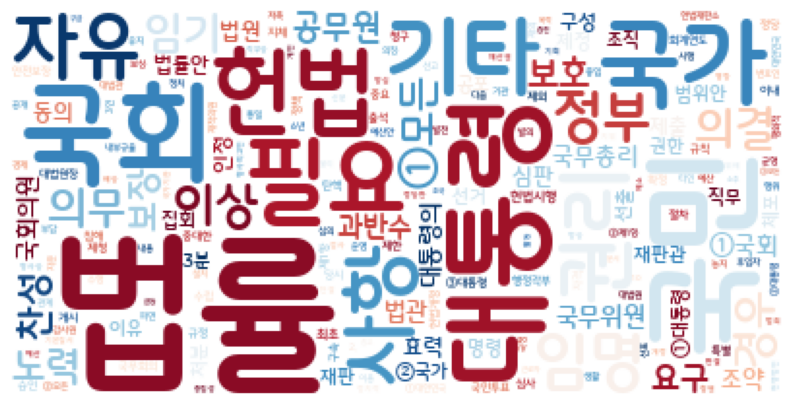

In [25]:
# 워드클라우드용 폰트 설정
wcs2 = WordCloud(font_path = 'C:/Windows/Fonts/HMFMOLD.TTF', 
                                    background_color = 'black', colormap='RdBu')

# 단어별 빈도로 워드클라우드 생성
cloud2 = wcs.generate_from_frequencies(cnt2)

# 워드클라우드 그리기
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
plt.axis('off')
plt.imshow(cloud2)
plt.savefig('data/wordcloud_002_consti.png') 


###### martin_luther_king

In [29]:
txt3 = open('data/wordcloud_002_martin_luther_king.txt','rt', encoding='UTF-8').read()
txt3

'20만 명이 넘는 흑인과 백인들이 경청하러 왔다. 그들은 비행기로, 자동차로, 버스로, 기차로 그리고 걸어서 왔다. 그들은 흑인의 평등한 권리를 요구하기 위해 워싱턴으로 온 것이었다. 그리고 그들이 기념관의 계단에서 들은 꿈은 한 세대의 꿈이 되었다.\n지금이야말로 바로 민주주의의 약속을 현실로 실현할 때입니다. 지금이야말로 바로 어둡고 쓸쓸한 인종 차별의 골짜기로부터 분기하여 인종적 정의의 햇볕 길로 나아가야 할 때입니다.\n흑인에게 시민권이 주어지기 전까지 미국에는 안식도 평온도 없을 것입니다. 정의의 밝은 날이 오기까지 반란의 회오리바람이 계속 우리 국가의 기반을 뒤흔들 것입니다.\n그러나 나는 정의의 궁전으로 들어가는 문턱에 서 있는 여러분에게 해야 할 말이 있습니다. 우리의 정당한 지위를 얻는 과정에서 우리가 부당한 행위를 해서는 안 됩니다. 흑인 사회를 집어 삼켜버린 놀라운 새 투지가 모든 백인에 대한 불신으로 이어져서는 안 됩니다. 오늘 그들이 이 자리에 참석한 사실이 입증하듯, 우리의 많은 백인 형제들은 그들의 자유가 어쩔 수 없이 우리의 자유에 결부되어 있다는 사실을 깨닫게 되었기 때문입니다.\n고난 속의 영예는 보상 받는다는 믿음을 가지고 계속 일합시다. 미시시피 주로, 앨라배마 주로, 루이지애나 주로 그리고 우리 북부 여러 도시의 빈민가와 게토로 돌아가십시오. 그리고 이러한 현실은 변화될 수 있는 것일 뿐만 아니라, 또한 변화될 것임을 아십시오.\n나는 오늘 나의 여러 친구들에게 말하노니, 나는 어려움과 좌절의 순간이 있었지만 아직도 꿈을 가지고 있습니다. 그것은 아메리칸 드림에 깊이 뿌리 박은 꿈입니다.\n나는 언젠가는 이 나라 국민들이 분기하여 “우리는 모든 인간이 평등하게 창조되었음을 자명한 진리로 삼는다”는 이 나라 국민 신조의 참 뜻을 체험하게 될 것이라는 꿈을 가지고 있습니다.\n나는 언젠가는 조지아 주의 붉은 언덕에서 옛 노예의 자손들이 옛 노예 소유주의 자손들과 함께 형제애의 테이블에 앉을 수 있게 되리라는 꿈을 가지고 있습

In [30]:
n3 = Hannanum().nouns(txt3)
n3

['20',
 '명',
 '흑인',
 '백',
 '들',
 '경청',
 '그',
 '비행기',
 '자동차',
 '버스',
 '기차',
 '그',
 '흑인',
 '평등',
 '권리',
 '요구',
 '워싱턴',
 '것',
 '그',
 '기념관',
 '계단',
 '꿈',
 '세대',
 '꿈',
 '지금',
 '민주주의',
 '약속',
 '현실',
 '실현',
 '때',
 '지금',
 '쓸쓸',
 '인종',
 '차별',
 '골짜기',
 '분기',
 '인종적',
 '정의',
 '햇볕',
 '길',
 '때',
 '흑인',
 '시민권',
 '전',
 '미국',
 '식',
 '평온',
 '것',
 '정의',
 '날',
 '반란',
 '회오리바람',
 '우리',
 '국가',
 '기반',
 '것',
 '나',
 '정의',
 '궁전',
 '문턱',
 '여러분',
 '말',
 '우리',
 '정당한',
 '지위',
 '과정',
 '우리',
 '부당한',
 '행위',
 '흑',
 '사회',
 '투지',
 '백인',
 '불신',
 '오늘',
 '그',
 '자리',
 '참석',
 '사실',
 '입증',
 '우리',
 '백',
 '형제들',
 '그',
 '자유',
 '수',
 '우리',
 '자유',
 '결부',
 '사실',
 '때문',
 '고난',
 '속',
 '영예',
 '보상',
 '믿음',
 '일',
 '미시시피',
 '주',
 '앨라배마',
 '주',
 '루이지애',
 '주',
 '우리',
 '북부',
 '도시',
 '빈민가',
 '게토',
 '현실',
 '변화',
 '수',
 '것',
 '뿐',
 '변화',
 '것',
 '나',
 '오늘',
 '나',
 '친구들',
 '말',
 '나',
 '어려움',
 '좌절',
 '순간',
 '꿈',
 '그것',
 '아메리칸',
 '뿌리',
 '꿈',
 '나',
 '국민들',
 '분기',
 '“우리',
 '인간',
 '평등',
 '창조',
 '자명',
 '리',
 '삼는다”는',
 '나',
 '국민',
 '신조',
 '뜻',
 '체험',
 '것

In [31]:
n4 = [item for item in n3  if len(item) >= 2]
n4

['20',
 '흑인',
 '경청',
 '비행기',
 '자동차',
 '버스',
 '기차',
 '흑인',
 '평등',
 '권리',
 '요구',
 '워싱턴',
 '기념관',
 '계단',
 '세대',
 '지금',
 '민주주의',
 '약속',
 '현실',
 '실현',
 '지금',
 '쓸쓸',
 '인종',
 '차별',
 '골짜기',
 '분기',
 '인종적',
 '정의',
 '햇볕',
 '흑인',
 '시민권',
 '미국',
 '평온',
 '정의',
 '반란',
 '회오리바람',
 '우리',
 '국가',
 '기반',
 '정의',
 '궁전',
 '문턱',
 '여러분',
 '우리',
 '정당한',
 '지위',
 '과정',
 '우리',
 '부당한',
 '행위',
 '사회',
 '투지',
 '백인',
 '불신',
 '오늘',
 '자리',
 '참석',
 '사실',
 '입증',
 '우리',
 '형제들',
 '자유',
 '우리',
 '자유',
 '결부',
 '사실',
 '때문',
 '고난',
 '영예',
 '보상',
 '믿음',
 '미시시피',
 '앨라배마',
 '루이지애',
 '우리',
 '북부',
 '도시',
 '빈민가',
 '게토',
 '현실',
 '변화',
 '변화',
 '오늘',
 '친구들',
 '어려움',
 '좌절',
 '순간',
 '그것',
 '아메리칸',
 '뿌리',
 '국민들',
 '분기',
 '“우리',
 '인간',
 '평등',
 '창조',
 '자명',
 '삼는다”는',
 '국민',
 '신조',
 '체험',
 '조지아',
 '언덕',
 '노예',
 '자손들',
 '노예',
 '소유주',
 '자손들',
 '형제애',
 '테이블',
 '4명',
 '자녀들이',
 '피부색',
 '판단',
 '인품',
 '판단',
 '나라',
 '오늘',
 '있습니다…',
 '미국',
 '위대한',
 '나라',
 '실현',
 '자유',
 '뉴햄프셔주',
 '거대',
 '언덕',
 '자유',
 '뉴욕주',
 '강대',
 '자유',
 '펜실베이니아주',
 '앨리게',
 '산맥',
 '자유',


In [32]:
cnt3 = Counter(n4)
cnt3

Counter({'20': 1,
         '흑인': 4,
         '경청': 1,
         '비행기': 1,
         '자동차': 1,
         '버스': 1,
         '기차': 1,
         '평등': 2,
         '권리': 1,
         '요구': 1,
         '워싱턴': 1,
         '기념관': 1,
         '계단': 1,
         '세대': 1,
         '지금': 2,
         '민주주의': 1,
         '약속': 1,
         '현실': 2,
         '실현': 2,
         '쓸쓸': 1,
         '인종': 1,
         '차별': 1,
         '골짜기': 1,
         '분기': 2,
         '인종적': 1,
         '정의': 3,
         '햇볕': 1,
         '시민권': 1,
         '미국': 2,
         '평온': 1,
         '반란': 1,
         '회오리바람': 1,
         '우리': 8,
         '국가': 1,
         '기반': 1,
         '궁전': 1,
         '문턱': 1,
         '여러분': 1,
         '정당한': 1,
         '지위': 1,
         '과정': 1,
         '부당한': 1,
         '행위': 1,
         '사회': 1,
         '투지': 1,
         '백인': 1,
         '불신': 1,
         '오늘': 3,
         '자리': 1,
         '참석': 1,
         '사실': 2,
         '입증': 1,
         '형제들': 1,
         '자유': 12,
         '결

In [33]:
m = np.array(Image.open('data/002.png'))  ## 마스크로 사용할 이미지

wcs3 = WordCloud(font_path = 'C:/Windows/Fonts/MalangmalangB.ttf',
                background_color = 'white',
                width=1000, height=700,
                max_words=100,         ## 워드클라우드에 나타낼 단어의 최대 개수
                max_font_size=200,     ## 폰트 사이즈
                colormap = 'Accent',
                mask=m                 ## 마스크 모양으로 사용할 이미지가 저장된 변수
                )
cloud3 = wcs3.generate_from_frequencies(cnt3)

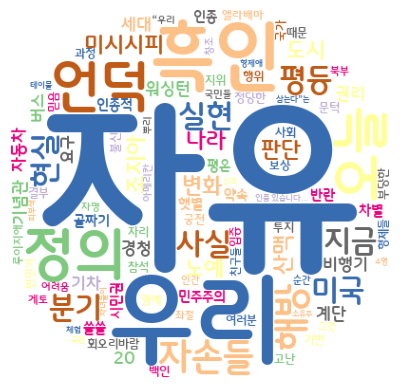

In [34]:
import matplotlib.pyplot as plt
plt.imshow(cloud3)                   
plt.axis('off')                        
plt.savefig('data/wordcloud003_martin_luther_king.png') 

###### 영문 자료 _ wordcloud_004

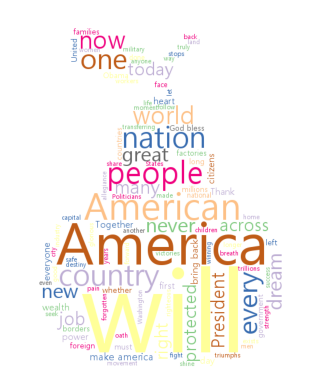

In [37]:
from wordcloud import WordCloud
import numpy as np
from PIL import Image

txt4 = open('data/wordcloud_003_usa_president_message.txt','rt', 
                                                            encoding='UTF-8').read()


m4 = np.array(Image.open('data/001.png'))
wcs4 = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf',
                background_color = 'white',
                width=1000, height=700,
                max_words=100,
                max_font_size=200,
                colormap = 'Accent',
                mask=m4
                ).generate(txt4)

import matplotlib.pyplot as plt
plt.imshow(wcs4)                  
plt.axis('off')                          
plt.savefig('data/wordcloud_004_english.png')          
